# Compressed Sensing OD Estimation Test
#### Evan Faulkner
#### 3/24/2021

### Compressed sensing method as described in:
#### https://arxiv.org/pdf/1404.3263.pdf

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import cvxpy as cp

### Generate Random Single Line OD Problem

In [2]:
N_stops = 5 # number of stops on the bus line
i_max = 20 # max flow from i to j
X_true = np.triu(np.random.randint(0,i_max+1,size=(N_stops,N_stops)),1) # true OD matrix, upper triangular, zero main diagonal
b = np.sum(X_true,1) # boarding counts
a = np.sum(X_true,0) # alighting counts

In [3]:
X = cp.Variable((N_stops,N_stops))
obj = cp.Minimize(cp.norm(cp.vec(X),1))
constraints = [
    cp.sum(X,axis=0,keepdims=False) == a,
    cp.sum(X,axis=1,keepdims=False) == b,
    cp.upper_tri(cp.transpose(X)) == 0,
    cp.diag(X) == 0,
    X >= 0
]
prob = cp.Problem(obj,constraints)
prob.solve()
X_hat = X.value
print("status:", prob.status)

status: optimal


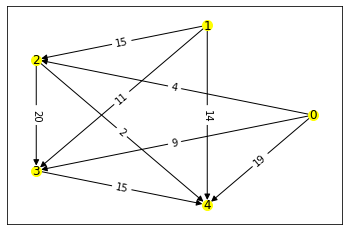

In [4]:
G = nx.from_numpy_matrix(X_true, create_using=nx.DiGraph)

options = {
    'node_color': 'yellow',
    'node_size': 100,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}
pos=nx.circular_layout(G)
nx.draw_networkx(G, pos, arrows=True, **options)
labels = nx.get_edge_attributes(G,'weight')
l=nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

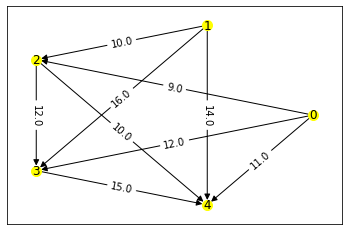

In [5]:
G = nx.from_numpy_matrix(X_hat.round(), create_using=nx.DiGraph)

options = {
    'node_color': 'yellow',
    'node_size': 100,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}
pos=nx.circular_layout(G)
nx.draw_networkx(G, pos, arrows=True, **options)
labels = nx.get_edge_attributes(G,'weight')
l=nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [8]:
X_true

array([[ 0,  0,  4,  9, 19],
       [ 0,  0, 15, 11, 14],
       [ 0,  0,  0, 20,  2],
       [ 0,  0,  0,  0, 15],
       [ 0,  0,  0,  0,  0]])

In [9]:
X_hat.round()

array([[ 0.,  0.,  9., 12., 11.],
       [ 0.,  0., 10., 16., 14.],
       [ 0.,  0.,  0., 12., 10.],
       [ 0.,  0.,  0.,  0., 15.],
       [-0., -0.,  0.,  0.,  0.]])